1. Create an HTML Page

2. Create a Python file which opens the HTML file created in Browser

3. Get the values from the Browser

4. Give them to the model which is Already built

5. Showcase the Prediction


How we get this Model:
1. First write the Algorithm

2. Save the model

3. Save the scalars

4. Save One hot encoded values

5. We have two types of One hot encoded values-  
     1. Normal OnehotEncoding+Label Encoding
                                               
     2. column Transform (Integrated transformer which performs both OHE +LE)

Different way of Data Preprocessing
1. Importing libraries

2. Handling Missing values

3. Column Transformer -ONE+LE at a time

4. Split the data

5. Train-Test

6. Algorithm

7. Testing


### Important Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the Dataset

In [8]:
dataset=pd.read_csv("50Startup.csv")
dataset.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Check for NULL values

In [11]:
dataset.isna().any()

#No Missing Values 

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

### Describe the Data to get Statistical Information about the dataset

In [13]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Correlation between Inputs and Outputs

In [14]:
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### Making a Box Plot to check if Outliers is there or not

In [15]:
import seaborn as sns

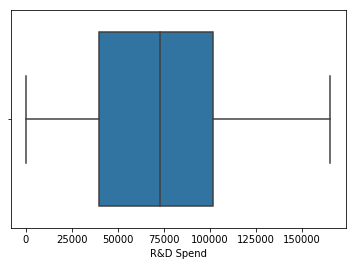

In [16]:
sns.boxplot(dataset['R&D Spend']) #No Outliers as shown in Boxplot

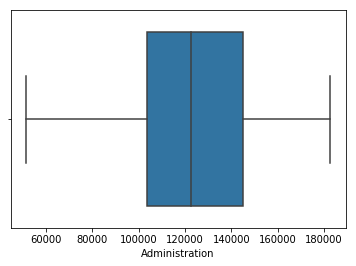

In [17]:
sns.boxplot(dataset['Administration']) #No Outliers as shown in Boxplot

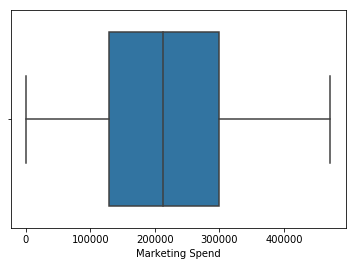

In [18]:
sns.boxplot(dataset['Marketing Spend']) #No Outliers as shown in Boxplot

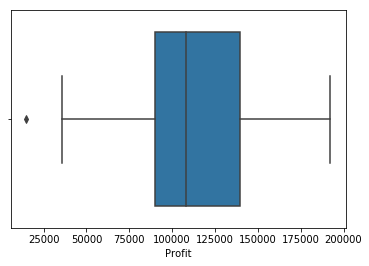

In [19]:
sns.boxplot(dataset['Profit']) #No Outliers as shown in Boxplot except 1

### Plotting a HeatMap

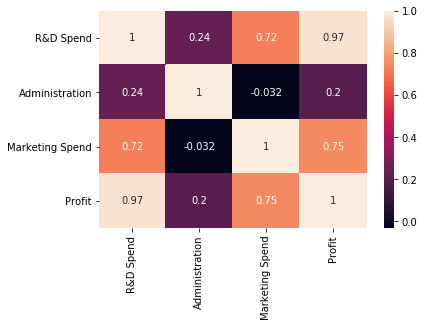

In [20]:
sns.heatmap(dataset.corr(),annot=True)

### Drop 49th row

In [21]:
dataset.drop(49,axis=0,inplace=True)

In [23]:
dataset.head(15)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [81]:
x=dataset.iloc[:,0:4].values

In [82]:
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [96]:
x.shape

(49, 6)

In [79]:
y=dataset.iloc[:,4].values

In [80]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41])

### Apply Column transformation

In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [84]:
ct=ColumnTransformer([("oh",OneHotEncoder(),[3])],remainder="passthrough")
x=ct.fit_transform(x)
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

### Importing joblib library:
#### This library is used to save all the transformation which will be done during model building 

In [85]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


These one hot encoded values are
necessary for future purpose so we must save the import joblib

In [86]:
import joblib
joblib.dump(ct,"column")

['column']

In [87]:
x.shape

(49, 6)

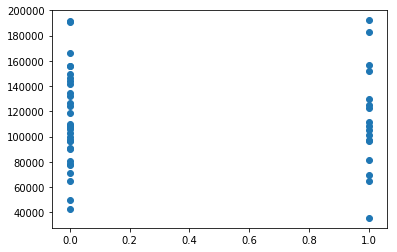

In [88]:
plt.scatter(x[:,2],y)

### Train-Test Split

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [101]:
x_train[0]

array([1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55], dtype=object)

In [102]:
y_test

array([101004.64, 166187.94, 105733.54,  99937.59,  97427.84,  89949.14,
        96712.8 ,  78239.91, 155752.6 , 146121.95])

In [103]:
x_test

array([[0.0, 0.0, 1.0, 65605.48, 153032.06, 107138.38],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 0.0, 75328.87, 144135.98, 134050.07],
       [0.0, 1.0, 0.0, 61994.48, 115641.28, 91131.24],
       [1.0, 0.0, 0.0, 63408.86, 129219.61, 46085.25],
       [1.0, 0.0, 0.0, 44069.95, 51283.14, 197029.42],
       [1.0, 0.0, 0.0, 46426.07, 157693.92, 210797.67],
       [1.0, 0.0, 0.0, 28754.33, 118546.05, 172795.67],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95]], dtype=object)

### Fit the Model

In [91]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,criterion="mse",random_state=0)
rf.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

### Check for Prediction

In [104]:
y_pred=rf.predict(x_test)
y_pred

array([104688.2333, 167498.9014, 114870.6267,  99849.6886, 103394.9039,
        91692.6676,  93824.0659,  81817.7634, 151087.4642, 139249.9089])

In [105]:
len(y_test)

10

In [106]:
y_test.ndim

1

In [107]:
len(y_pred)

10

In [108]:
y_pred.ndim

1

### Check the Perfromance of Model

In [109]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9727911007162029

### Loading the column Transform

In [110]:
new=joblib.load('column') #saving one hot encoded values

### Check the performance of model for some random input

In [112]:
p=new.transform([[165349.2,136997.8,471784.1,'New York']]) 

#tarnsforming  New York to one hot encoded valueusing new and then we can directly give that p to prediction

In [113]:
rf.predict(p)

array([189546.9338])

In [114]:
p=new.transform([[1649.2,16997.8,47178.1,'New York']]) 

In [115]:
rf.predict(p)

array([57037.6499])

### Save model using pickle 

In [116]:
import pickle
pickle.dump(rf,open('profit.pkl','wb')) 

#Create profit.pkl file and dumping all contents of rf(model) on to it in the mode 'wb' write binary